In [7]:
import becquerel as bq
from becquerel import Spectrum
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math as m
import importlib

In [8]:
import PF
import ROI
importlib.reload(PF)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\Daniel\\Desktop\\Radwatch\\radwatch-analysis\\ROI.py'>

In [10]:
#Define inputs
source_isotopes = np.array(['Bi-214']);
source_energies = np.array([609]);
#source_activities = np.array([1,1,1]);
spectrum = r'C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1901-30min.Spe'
background = r'C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\Background_Spectrum_12_20_19.Spe'
#branching_ratio = np.array([1,1,1]);

#PF input should be calibrated spectrum objects, ROI and PF methods inform us about systematic uncertainties, can 
# do both for a few that will work well for that method and then compare to PF method, variation sys. uncertainties and as energy changes
#Can use PF for main analysis

#Call scripts
#roi = ROI.ROI(Spectrum.from_file(spectrum), Spectrum.from_file(background), source_energies)
#roi.find_peak_energies()
#roi_result = roi.get_counts()
peakfit = PF.PF(spectrum,background,source_energies)
pf_result = peakfit.get_counts()
print()
print(pf_result)

AttributeError: 'str' object has no attribute 'counts_vals'

In [57]:
#function to find index of closest energy where a is the desired energy and n is 
def f_near(a,a0):
    idx = np.abs(a - a0).argmin()
    return idx

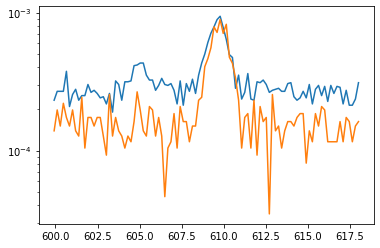

In [74]:
counts = roi.spec.cps_vals
energies = roi.spec.energies_kev
bgcounts = roi.bg.cps_vals
#counts = roi.bgsub.cps_vals
#energies = roi.bgsub.energies_kev
iso_idx = f_near(energies,source_energies[0])

#test plotting
roi_low = iso_idx - 50
roi_high = iso_idx + 50

# Slice the counts array: select counts[start-index:stop-index]
plot_counts = counts[roi_low:roi_high]
plot_bgcounts = bgcounts[roi_low:roi_high]
plot_energies = energies[roi_low:roi_high]

plt.plot(plot_energies,plot_counts)
plt.plot(plot_energies,plot_bgcounts)
#plt.plot(spec.energies_kev,spec.counts_vals)
plt.yscale('log')

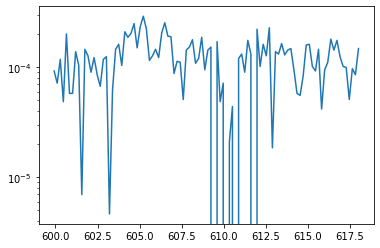

In [75]:
sub_counts = roi.bgsub.cps_vals
plot_sub_counts = sub_counts[roi_low:roi_high]
plot_energies = energies[roi_low:roi_high]

plt.plot(plot_energies,plot_sub_counts)
plt.yscale('log')

In [65]:
roi_low_bins, roi_peak_bins, roi_high_bins = roi.get_roi_windows(source_energies[0])
print(roi.window)

print(roi_low_bins[0])
print(roi_peak_bins[0])
print(roi_high_bins[0])

[[-2.  -1. ]
 [-0.5  0.5]
 [ 1.   2. ]]
[3277 3278 3279 3280 3281 3282 3283 3284 3285 3286 3287 3288 3289 3290
 3291 3292 3293 3294 3295 3296 3297 3298 3299 3300 3301 3302 3303 3304]
[3318 3319 3320 3321 3322 3323 3324 3325 3326 3327 3328 3329 3330 3331
 3332 3333 3334 3335 3336 3337 3338 3339 3340 3341 3342 3343 3344 3345]
[3360 3361 3362 3363 3364 3365 3366 3367 3368 3369 3370 3371 3372 3373
 3374 3375 3376 3377 3378 3379 3380 3381 3382 3383 3384 3385 3386]


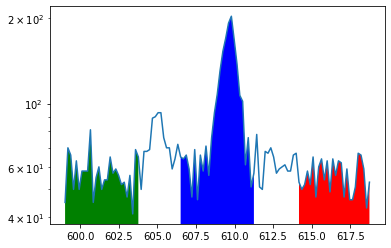

In [66]:
rlow = roi_low_bins[0][0]
rhi = roi_high_bins[0][-1]

plot_counts = counts[rlow:rhi]
plot_energies = energies[rlow:rhi]

rhi = roi_low_bins[0][-1]
low_counts = counts[rlow:rhi]
low_energies = energies[rlow:rhi]

rlow = roi_high_bins[0][0]
rhi = roi_high_bins[0][-1]
high_counts = counts[rlow:rhi]
high_energies = energies[rlow:rhi]

rlow = roi_peak_bins[0][0]
rhi = roi_peak_bins[0][-1]
peak_counts = counts[rlow:rhi]
peak_energies = energies[rlow:rhi]

fig, ax = plt.subplots()
ax.plot(plot_energies,plot_counts)

ax.fill_between(low_energies, 0, low_counts, facecolor='green', interpolate=True)
ax.fill_between(high_energies, 0, high_counts, facecolor='red', interpolate=True)
ax.fill_between(peak_energies, 0, peak_counts, facecolor='blue', interpolate=True)
ax.set_yscale('log')

In [67]:
idx = (roi.spec.energies_kev > roi.target_peaks[0]+roi.window[1,0]*roi.delta_E)*(roi.spec.energies_kev < roi.target_peaks[0]+roi.window[1,1]*roi.delta_E)
bins = np.where(idx)
print(roi.spec.energies_kev[bins])
local_idx = np.argmax(roi.spec.counts[bins])
print(local_idx)
index = bins[0][0] + local_idx
print(roi.spec.energies_kev[index])

[606.50069419 606.68349354 606.86629288 607.04909222 607.23189156
 607.41469089 607.59749023 607.78028956 607.9630889  608.14588823
 608.32868756 608.51148689 608.69428622 608.87708554 609.05988487
 609.24268419 609.42548351 609.60828284 609.79108216 609.97388147
 610.15668079 610.33948011 610.52227942 610.70507873 610.88787804
 611.07067735 611.25347666 611.43627597]
18
609.7910821551591


In [68]:
roi.target_peaks

array([609])